# 1.) Preprocess your data into scaled input variables and an output variable


In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/week 6/CLV.csv")

In [5]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [10]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,)], 
    "activation" : ['relu','logistic']
}

In [11]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(10,), (20, 5)]})

In [12]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (20, 5)}


# 3.) Train a model with the optimal solution from GridSearch

In [16]:
model = MLPRegressor(**grid.best_params_)

# 4.) What are the in-sample and out of sample MSEs

In [18]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("In-sample MSE: ", mse_train)
print("Out-of-sample MSE: ", mse_test)

In-sample MSE:  41901588.61713209
Out-of-sample MSE:  47309886.48611788


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [33]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=X_train.shape[1], activation=activation))
        else:
            model.add(Dense(nodes, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [54]:
# Define the parameter grid
param_grid = {
    'layers': [[13, 13], [13, 13, 13]],
    'activation': ['relu', 'tanh']
}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object on the data
grid_result = grid.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_result.best_params_)

# Create a new KerasRegressor object with the best parameters
best_model = KerasRegressor(build_fn=create_model, layers=grid_result.best_params_['layers'], activation=grid_result.best_params_['activation'], verbose=0)

Best Parameters:  {'activation': 'relu', 'layers': [13, 13, 13]}


<ipython-input-54-7f6eee389bcc>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  best_model = KerasRegressor(build_fn=create_model, layers=grid_result.best_params_['layers'], activation=grid_result.best_params_['activation'], verbose=0)


In [55]:
# Fit the model on the data
best_model.fit(X_train, y_train)

# Use the model to make predictions
y_pred = best_model.predict(X_test)

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [57]:
best_model

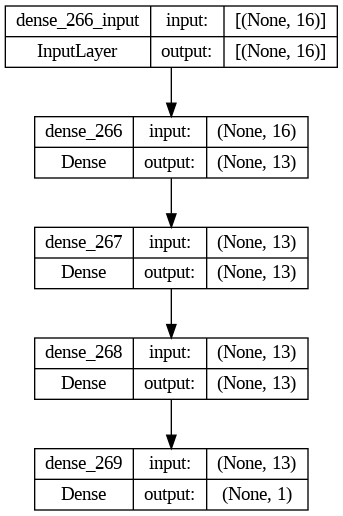

In [74]:
from keras.models import Model
from keras.utils import plot_model
from ann_visualizer.visualize import ann_viz
from IPython.display import Image, HTML

# Convert the KerasRegressor model to a Keras model
model = best_model.model

# Use plot_model to create a visualization of the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True)

# Display the PNG image in the notebook
Image(filename='model_plot.png')

In [76]:
# Generate a visualization of the model using ann_viz
ann_viz(model, view=True, filename='model_viz.html')

# Display the model visualization
HTML(filename='model_viz.html')